In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# Cargamos las librerías necesarias
import math
from functools import reduce

import pandas as pd
import numpy as np
from pygam import GAM, te, f, s, te
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
import eli5
from eli5.sklearn import PermutationImportance
import shap

from src.visualization.metrics_summary import cross_val_reg, gam_cross_val_reg, err_hist, pred_hist, plot_residuo, plot_corr_matrix

/home/vacek/anaconda3/envs/descansare/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/vacek/anaconda3/envs/descansare/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
# Leemos los datos
perfiles_sqr = pd.read_parquet('../data/processed/perfiles_sqr_knn.parquet')

# Lateral = 0, Supine = 1
# Male = 1, Female = 0

In [8]:
describe_presiones = perfiles_sqr.groupby('presiones').describe()

In [13]:
sqr_presiones = describe_presiones.loc[:, 'sqr']

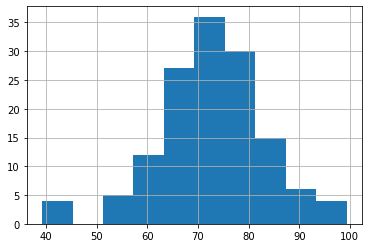

In [19]:
sqr_presiones['mean'].hist();

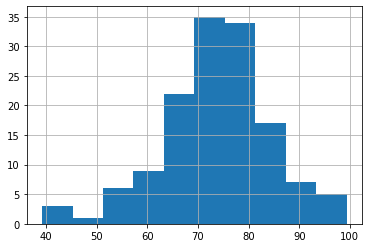

In [18]:
sqr_presiones['50%'].hist();

In [20]:
sqr_presiones['50%'].describe()

count    139.000000
mean      73.848543
std       10.810187
min       39.203386
25%       68.182906
50%       74.200886
75%       80.056746
max       99.341667
Name: 50%, dtype: float64

In [26]:
[i for i in sqr_presiones.index if sqr_presiones.loc[i, '50%'] < 68.182906]

['002211',
 '010001',
 '010002',
 '011122',
 '012321',
 '012322',
 '012332',
 '021112',
 '022333',
 '022421',
 '023421',
 '030111',
 '033222',
 '042045',
 '042233',
 '102012',
 '111111',
 '122321',
 '123211',
 '123222',
 '123343',
 '133301',
 '133331',
 '133431',
 '133432',
 '135321',
 '144332',
 '233332',
 '233343',
 '233443',
 '335532',
 '423330',
 '525332',
 '534451',
 '555554']

In [27]:
[i for i in sqr_presiones.index if 68.182906 <= sqr_presiones.loc[i, '50%'] <= 80.056746]

['000000',
 '000001',
 '000333',
 '003333',
 '010010',
 '010022',
 '011111',
 '012211',
 '012221',
 '012222',
 '012232',
 '012311',
 '022110',
 '022111',
 '022211',
 '022212',
 '022221',
 '022222',
 '022320',
 '022321',
 '022332',
 '023211',
 '023321',
 '023332',
 '033211',
 '033212',
 '033330',
 '033333',
 '040034',
 '101111',
 '101220',
 '110012',
 '110302',
 '112233',
 '112321',
 '113333',
 '122211',
 '122212',
 '122221',
 '122222',
 '122232',
 '122322',
 '122332',
 '123321',
 '123322',
 '123332',
 '123333',
 '132332',
 '133332',
 '134312',
 '222222',
 '223333',
 '233333',
 '233432',
 '234432',
 '234443',
 '234453',
 '234532',
 '333333',
 '334443',
 '334444',
 '335541',
 '355544',
 '435533',
 '444453',
 '543455',
 '555443',
 '555532',
 '555555']

In [28]:
[i for i in sqr_presiones.index if sqr_presiones.loc[i, '50%'] > 80.056746]

['000002',
 '000321',
 '001310',
 '011000',
 '011100',
 '022311',
 '023111',
 '023112',
 '023212',
 '023322',
 '032325',
 '033321',
 '043311',
 '112221',
 '112232',
 '120022',
 '123212',
 '123312',
 '123331',
 '123421',
 '133321',
 '222000',
 '223332',
 '223344',
 '233321',
 '233433',
 '234323',
 '334432',
 '343333',
 '344333',
 '355345',
 '423334',
 '432221',
 '444444',
 '455554']